In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Step 1: Load and Preprocess the Dataset
# Define your dataset directory
data_dir = 'C:\\Users\\prem\\Desktop\\intern skill craft\\leapGestRecog'  # Update this to your dataset path
# Parameters
img_size = (64, 64)  # Resize images to this size
batch_size = 32

# Use ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 32000 images belonging to 11 classes.
Found 8000 images belonging to 11 classes.


In [ ]:
# Step 2: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Abhay\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 3: Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

C:\Users\Abhay\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 200s 194ms/step - accuracy: 0.5463 - loss: 1.2572 - val_accuracy: 0.1000 - val_loss: 5.4433
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15


C:\Users\Abhay\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 192s 192ms/step - accuracy: 0.5956 - loss: 0.6431 - val_accuracy: 0.1000 - val_loss: 7.1399
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 91us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 192s 192ms/step - accuracy: 0.5908 - loss: 0.6062 - val_accuracy: 0.1000 - val_loss: 8.7908
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 102us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 192s 192ms/step - accuracy: 0.5996 - loss: 0.5967 - val_accuracy: 0.1000 - val_loss: 9.1266
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 92us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 191s 191ms/step - accuracy: 0.5984 - loss: 0.5886 - val_accuracy: 0.1000 - val_loss: 10.0292
Epoch 10/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 192s 192ms/step - accuracy: 0.6039 - loss

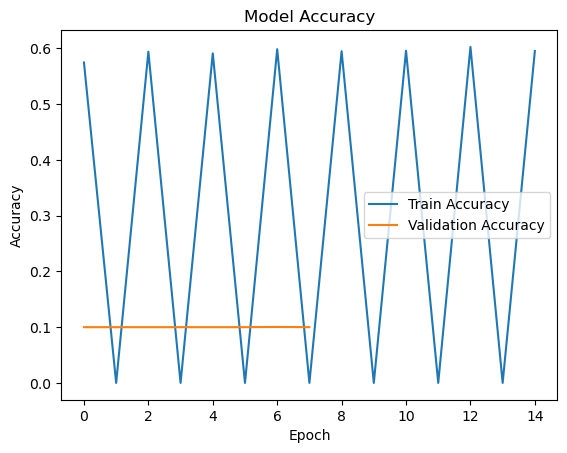

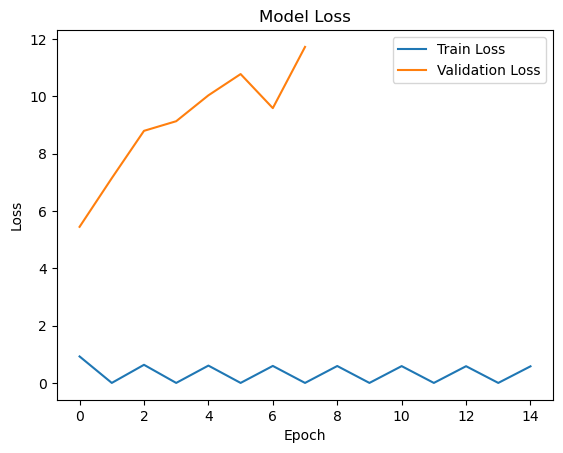

In [ ]:
# Step 4: Evaluate the Model
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
model.save('hand_gesture_recognition_model.h5')

In [ ]:
#Step 5: Test the Model
# To test with new images or video, you can use the following:
def load_and_predict(image_path):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = train_generator.class_indices
    class_labels = {v: k for k, v in class_labels.items()}
    return class_labels[class_index]

In [ ]:
# Example usage
print(load_and_predict('C:\\Users\\prem\\Desktop\\intern skill craft\\leapGestRecog\\06\\07_ok\\frame_06_07_0116.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
06


NameError: name 'y_true' is not defined